<a href="https://colab.research.google.com/github/BakedBel/CodigosProyecto/blob/main/Analisis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [ ]:
#En esta parte se descargan las matrices en formato txt

#data1=np.genfromtxt("INLINE_solido_4mm_exactos.txt")
#data4=np.genfromtxt("PP-PMMA-Cylinder-OD-4-mm.txt")
data5=np.genfromtxt("FF_completo.txt")
data2=np.genfromtxt("RAW28kV_4mm_solido_verb0.txt")
data3=np.genfromtxt("CilindroSolido.txt")
#data6=np.genfromtxt("inline_graciasdios.txt")
#data7=np.genfromtxt("imagen_geant_30kV.txt")
#data8=np.genfromtxt("datos_prueba1.txt")
FF=np.genfromtxt("inline_S_FF.txt")
#FFlab2=np.genfromtxt("FF_solido_lab.txt")
#FFlab=np.genfromtxt("FF_solido.txt")
#data8=np.genfromtxt("inlineT2.txt")
#data9=np.genfromtxt('FFT2.txt')

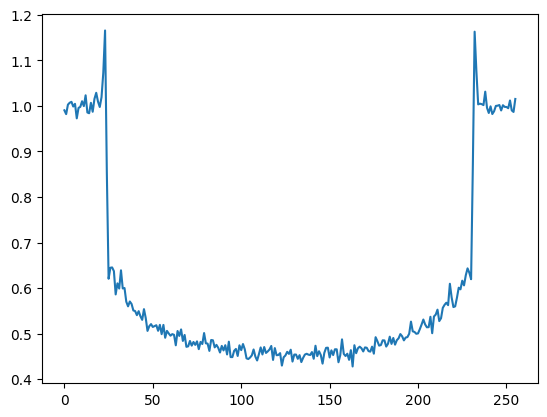

In [ ]:
#Aquí se saca el perfil de MCXTrace con una normalización del fondo

prom=np.mean(data3,axis=1)
promt = prom.T
background_exp=[]
b1 = promt[0:10]
b2 = promt[240:250]
background_exp.append(b1)
background_exp.append(b2)
imagen = data3/np.mean(background_exp)
columna = imagen[:, 50]  # Extrae la columna 50 completa
plt.plot(columna)


In [ ]:
#Aquí se descargan los datos de laboratorio y se recortan de ser necesario con el detector de CdTe

intensidad = data1/FF
volteada = (intensidad-0.98)/(1-0.98)

umbral_maximo = np.percentile(volteada, 99.5)  # Elige un percentil adecuado para limitar la intensidad
imagen_clipped = np.clip(volteada, None, umbral_maximo)

# Define los píxeles que quieres usar para recortar los bordes
x_min, x_max = 5, 250  # Rango de recorte en el eje x
y_min, y_max = 100, 250  # Rango de recorte en el eje y

# Recorta la imagen
#imagen_recortada = imagen_clipped[y_min:y_max, x_min:x_max]


perfil_promedio = np.mean(imagen_clipped, axis=0)


#plt.plot(blue_curve_shifted)
plt.plot(perfil_promedio)

plt.xlabel('Posición')
plt.ylabel('Intensidad Normalizada')
plt.title('Perfil de Intensidad')
plt.legend(["Lab solido", "Lab hueco", "MCXTrace"])
plt.grid(True)
plt.show()


NameError: name 'data1' is not defined

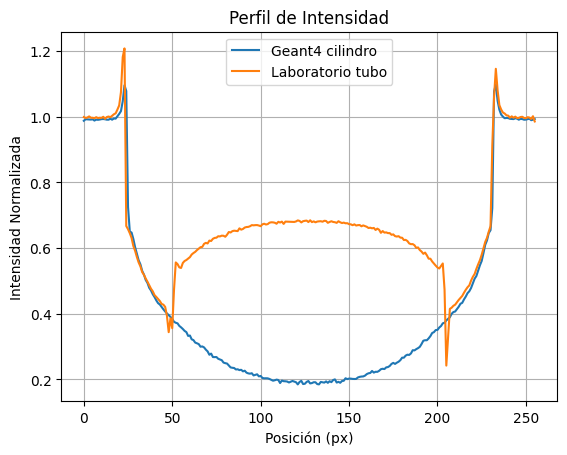

In [ ]:
intensidadlabHu = data5*10
volteada = np.transpose(intensidadlabHu)

intgean=data2/FF
intG=(intgean-0.98)/(1-0.98)+0.25

perfillabHu = np.mean(volteada, axis=0)

#prom=np.mean(intG,axis=1)
#promt = prom.T
#background_exp=[]
#b1 = promt[0:10]
#b2 = promt[240:250]
#background_exp.append(b1)
#background_exp.append(b2)
#perfilmcx = prom/np.mean(background_exp)

#perfil_promedioHu = np.mean(intensidadlabHu, axis=0)
perfil_promedioG=np.mean(intG,axis=0)

#columna = imagen_recortada[50, :]  # Extrae la columna 50 completa

#plt.plot(blue_curve_shifted)
plt.plot(perfil_promedioG)
plt.plot(perfillabHu)
#plt.plot(perfil)

plt.xlabel('Posición (px)')
plt.ylabel('Intensidad Normalizada')
plt.title('Perfil de Intensidad')
plt.legend(["Geant4 cilindro", "Laboratorio tubo", "MCXTrace"])
plt.grid(True)
plt.show()

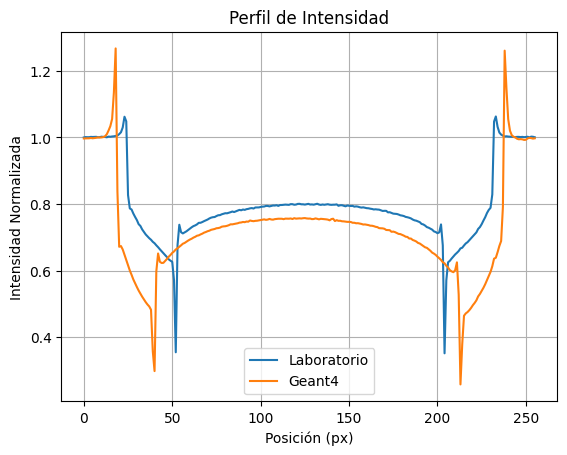

In [ ]:
intensidad1 = data6/FF  # Matriz de 100x100 con valores aleatorios de intensidad
intensidad_normalizada = ((intensidad1)-0.9672)/(1-0.968)
#intensidad =  ((intensidad1 -0.98)/(1-0.98))

x_min, x_max = 0, 255  # Rango de recorte en el eje x
y_min, y_max = 0, 255  # Rango de recorte en el eje y

# Recorta la imagen
imagen_re_geant = intensidad1[y_min:y_max, x_min:x_max]

perfil_geantHu = np.mean(intensidad_normalizada, axis=0)


#umbral_minimo = np.percentile(perfil_geantHu, 0.6)  # Elige un percentil adecuado para limitar la intensidad baja
#geant_clipped = np.clip(perfil_geantHu, umbral_minimo, None)



#columna = intensidad[50, :]  # Extrae la columna 50 completa
#plt.plot(perfil_promedio)

#plt.plot(blue_curve_shifted)
plt.plot(perfil_geantHu)
plt.plot(pfiLabHu)
#plt.plot(perfil)
#plt.plot(geant_clipped)
plt.xlabel('Posición (px)')
plt.ylabel('Intensidad Normalizada')
plt.title('Perfil de Intensidad')
plt.grid(True)
plt.legend(["Laboratorio", "Geant4", "MCXTrace"])
plt.show()


In [ ]:
intensidad = data8/data9
intensidad_normalizada = ((intensidad)-0.9672)/(1-0.967)



perfil_geantHu = np.mean(intensidad_normalizada, axis=0)
plt.plot(perfil_geantHu)

plt.xlabel('Posición (px)')
plt.ylabel('Intensidad Normalizada')
plt.title('Perfil de Intensidad')
plt.grid(True)
#plt.legend(["Laboratorio", "Geant4", "MCXTrace"])
plt.show()


In [ ]:
transpuesta= np.transpose(intensidad_lab)

columna = intensidad_mcx[50, :]  # Extrae la columna 50 completa
plt.plot(columna)
plt.xlabel('Posición')
plt.ylabel('Intensidad Normalizada')
plt.title('Perfil de Intensidad')
plt.grid(True)
plt.show()


In [ ]:
#imagen 2D Lab
intensidad = data6/FFlab2*3

intensidadnorm= ((intensidad-1)/0.57) +1
volteada = np.transpose(intensidadnorm)

umbral_maximo = np.percentile(intensidad, 99.6)  # Elige un percentil adecuado para limitar la intensidad
imagen_clipped = np.clip(intensidad, None, umbral_maximo)

# Define los píxeles que quieres usar para recortar los bordes
x_min, x_max = 5, 250  # Rango de recorte en el eje x
y_min, y_max = 100, 250  # Rango de recorte en el eje y

# Recorta la imagen
imagen_recortada = imagen_clipped[y_min:y_max, x_min:x_max]

plt.imshow(imagen_recortada, cmap='viridis', origin='lower')
plt.colorbar(label='Intensidad Normalizada')
plt.title('Imagen 2D de Atenuación de Rayos X')
plt.show()

In [ ]:
#Código para sumar los FF de laboratorio
FFs = []

n_flats = 30
for i in range(n_flats):
  if i<60:
    flat = np.genfromtxt("FF-Event-Mode-frame1s-total30s_" + str(i).zfill(2) + "_Event.txt")
    FFs.append(flat)
  else:
    break

FFs = np.array(FFs)


FF = np.sum(FFs, axis = 0)
mean_FF = np.mean(FF)

FF[np.where(FF == 0)] = mean_FF

#FF chart
#chart("Falt Field", FF, "Flat field")

#Lugo haces esto usando data_1 como tus datos con muestra

img_1 = FF
np.savetxt('FF_solido_lab.txt', img_1)
#picos es las nalgas


In [ ]:
Eventoss = []

n_flats = 10
for i in range(n_flats):
  if i<60:
    flat = np.genfromtxt("RAW-Event-Mode-frame1s-total10s_" + str(i).zfill(2) + "_Event.txt")
    Eventoss.append(flat)
  else:
    break

Eventoss = np.array(Eventoss)


imagen = np.sum(Eventoss, axis = 0)
mean_imagen = np.mean(imagen)

imagen[np.where(imagen == 0)] = mean_imagen

#FF chart
#chart("Falt Field", FF, "Flat field")

img_2 = imagen
np.savetxt('28kV_cilindro_solido.txt', img_2)


In [ ]:
imagenlab=np.genfromtxt("FF_completo.txt")
imagen_norm_lab=imagenlab*10

In [ ]:
FF=np.genfromtxt("FF.txt")
#imagen_normalizada= data1/FF
#imagen_1 =(imagen_normalizada -0.9675)/(1-0.98)

imagen_2 = ((data4/FF-0.9675)/(1-0.98))

#imagen_3 = ((data5/FF)-0.9675)/(1-0.98)